In [61]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [62]:
import numpy as np #numpy
import pandas as pd #pandas
#Importamos la base de datos
data = pd.read_csv('age_gender.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [63]:

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [64]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


In [65]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()

In [66]:

X = np.array(data['pixels'].tolist())



In [54]:
X

array([array([0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
              0.57254905], dtype=float32)                                     ,
       array([0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
              0.5803922 ], dtype=float32)                                     ,
       array([0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
              0.42352942], dtype=float32)                                     ,
       ...,
       array([0.3019608 , 0.2901961 , 0.27058825, ..., 0.69411767, 0.7176471 ,
              0.72156864], dtype=float32)                                     ,
       array([0.6039216 , 0.6117647 , 0.62352943, ..., 0.77254903, 0.75686276,
              0.7490196 ], dtype=float32)                                     ,
       array([0.8156863 , 0.7607843 , 0.7294118 , ..., 0.47843137, 0.6117647 ,
              0.56078434], dtype=float32)                                     ],
      dtype=object)

In [67]:
## Converting pixels from 1D to 3D

X = X.reshape(X.shape[0],48,48,1)

In [68]:
from sklearn.model_selection import train_test_split
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37)

In [69]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

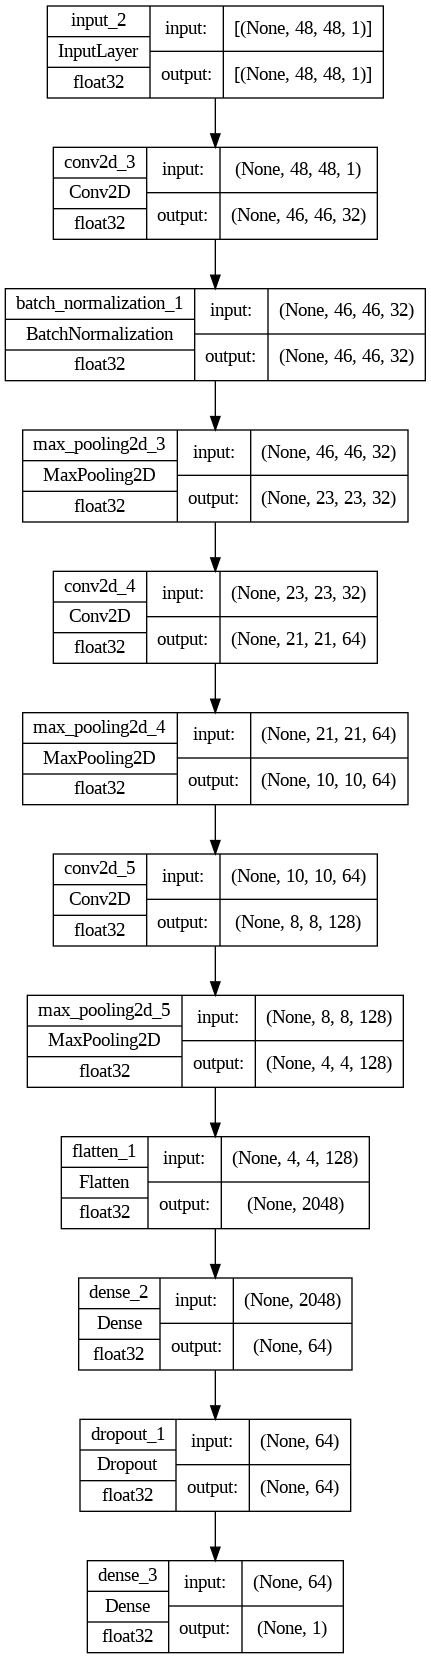

In [144]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [71]:
history = model.fit(
    X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 84s 319ms/step - loss: 265.8064 - mae: 12.4052 - val_loss: 975.0347 - val_mae: 25.7759
Epoch 2/20
260/260 [==============================] - 85s 327ms/step - loss: 192.4169 - mae: 10.4173 - val_loss: 443.0857 - val_mae: 16.2288
Epoch 3/20
260/260 [==============================] - 84s 323ms/step - loss: 170.5093 - mae: 9.7305 - val_loss: 123.0017 - val_mae: 8.0852
Epoch 4/20
260/260 [==============================] - ETA: 0s - loss: 158.0431 - mae: 9.2971
Reached 110 val_loss so cancelling training!
260/260 [==============================] - 83s 318ms/step - loss: 158.0431 - mae: 9.2971 - val_loss: 109.2661 - val_mae: 7.8559


In [72]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [108]:
prediction = model.predict(X_test)

163/163 [==============================] - 6s 37ms/step


In [109]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

163/163 [==============================] - 7s 40ms/step - loss: 106.8322 - mae: 7.7459
Test loss: 106.83216094970703
Test accuracy: 7.745904445648193


In [142]:
prediction_image = Image.open('pru.jpg')
prediction_array = np.array(prediction_image)

prediction_image_resized = prediction_image.resize((48, 48)).convert('L')
prediction_array_resized = np.array(prediction_image_resized)

prediction_array_resized = prediction_array_resized / 255.0

prediction_array_reshaped = np.reshape(prediction_array_resized, (1,48,48,1))


prediction = model.predict(prediction_array_reshaped)
prediction

1/1 [==============================] - 0s 24ms/step


array([[33.049408]], dtype=float32)

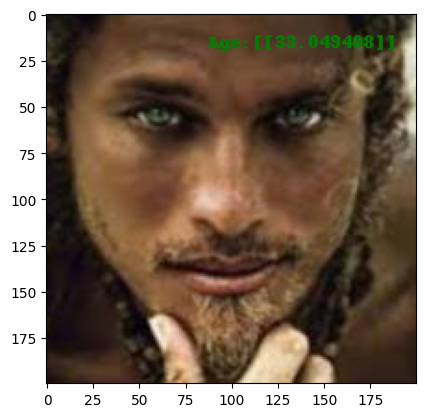

In [143]:
from PIL import Image, ImageDraw, ImageFont

# Crea una imagen en blanco
# Carga la imagen
img = Image.open('pru.jpg')

# Convierte la imagen a un array de numpy
img_array = np.array(img)
# Obtiene el objeto ImageDraw
draw = ImageDraw.Draw(img)
text = f"Age:{prediction}"
# Obtiene el ancho y la altura del texto
text_width, text_height = draw.textsize(text, font=None)

# Calcula las coordenadas para que el texto aparezca en la esquina superior derecha
x = img.width - text_width - 10
y = 10
# Dibuja el valor de la variable en la imagen
draw.text((x, y), str(f"Age:{prediction}"), font=None, fill='green')

# Guarda la imagen
img.save('my_image.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('my_image.png')
imgplot = plt.imshow(img)
plt.show()